In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import qetpy as qp
import pandas as pd
from scipy.signal import find_peaks

In [5]:
matplotlib.rc('font', size=16)          # controls default text sizes
matplotlib.rc('axes', titlesize=16)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=16)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=18)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=18)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=16)    # legend fontsize
matplotlib.rc('figure', titlesize=16)  # fontsize of the figure title
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rc('figure.subplot', hspace=  0.4)
fs = 1/2e-9
def process_data(trace):
    try:
        traceR = trace.reshape(int(np.floor(len(trace)/15000)),15000)
    except ValueError:
        trace = trace[:int(np.floor(len(trace)/15000))*15000,]
        traceR = trace.reshape(int(np.floor(len(trace)/15000)),15000)

    traceM = np.expand_dims(traceR[:,100:1000].mean(axis=1), axis=1)
    data= traceR-traceM
    print ('input trace length',trace.shape, 'processed trace shape',  data.shape)
    return data


def clippedwaveformsindex(data, clippingstart = -15100):
    clippedIdx = []
    data_max_idx = np.argmin(data, axis=1) 
    for i in range(len(data)):
        if data[i][data_max_idx[i]] < clippingstart:
            clippedIdx.append(i)
    return clippedIdx


def glitchesindex(data, threshold = 5):
    glitchesIdx = []
    
    std = ((data[:, 100:1000].std(axis=1)).reshape(len(data),1))
    t0idx = np.argmax(data<-(10*std), axis=1)   
        
    data_max_idx = np.argmin(data, axis=1)
    
    for i in range(len(data)):
        if data_max_idx[i] - t0idx[i] < threshold:
            glitchesIdx.append(i)
    return glitchesIdx


def pileupindex(data, ctype):
    pileupIdx, noisyIdx = [], []

    energy = np.sum(data/np.min(data, axis =1)[:, None], axis =1)
    
    if ctype == 'pure': distancefactor, prominencefactor = 15,  0.085
    else: distancefactor, prominencefactor = 200, 0.4
    if ctype == 'pure': threshold_min, threshold_max = 15,40
    else: threshold_min, threshold_max = 350,900
        
    data_max_idx = np.argmin(data, axis=1)
    data_max = data[np.arange(len(data_max_idx)),data_max_idx]  
    for i in range(0, len(data)):
        peaks, peak_properties = find_peaks(-data[i], prominence =(-data_max[i]*prominencefactor), distance=distancefactor)
        if len(peaks)>1 :
            pileupIdx.append(i)
        if energy[i] > threshold_max or energy[i] < threshold_min:
            noisyIdx.append(i)
    return pileupIdx, noisyIdx


In [6]:
pure_XFEL_BeamON = '../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_pure_XFEL06_21-07-28_00-06-24.txt'
pure_XFEL_BeamOFF ='../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_pure_XFEL06_21-07-26_09-13-14.txt'
pure_Elab ='../../../../../../../../media/s/SeagateHD/run12/wavedump_pure_run12_21-04-26_23-48-12.txt'
Tl_XFEL_BeamON = '../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_Tl_XFEL06_21-07-28_00-06-24.txt'
Tl_XFEL_BeamOFF ='../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_Tl_XFEL06_21-07-26_09-13-14.txt'
Tl_Elab ='../../../../../../../../media/s/SeagateHD/run12/wavedump_Tl_run12_21-04-26_23-48-12.txt'

In [75]:
trace= pd.read_csv(pure_XFEL_BeamON, chunksize=1500*15000, header = None )
trace_ = trace.get_chunk(1500*15000).values
trace_ = process_data(trace_)
print(trace_.shape)

psd_pure_XFEL_BeamON = qp.calc_psd(trace_ , 1/2e-9, False)
# psd_pure_XFEL_BeamOFF = qp.calc_psd(trace_ , 1/2e-9, False)
# psd_pure_Elab = qp.calc_psd(trace_ , 1/2e-9, False)
# psd_Tl_XFEL_BeamON = qp.calc_psd(trace_ , 1/2e-9, False)
# psd_Tl_XFEL_BeamOFF = qp.calc_psd(trace_ , 1/2e-9, False)
# psd_Tl_Elab = qp.calc_psd(trace_ , 1/2e-9, False)

<ipython-input-75-0b4be0082c91>:1: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_pure_XFEL06_21-07-28_00-06-24.txt' mode='r' encoding='utf-8'>
  trace= pd.read_csv(pure_XFEL_BeamON, chunksize=1500*15000, header = None )


input trace length (22500000, 1) processed trace shape (1500, 15000)
(1500, 15000)


In [140]:
trace= pd.read_csv(Tl_Elab, chunksize=1500*15000, header = None )
trace_ = trace.get_chunk(1500*15000).values
trace_ = process_data(trace_)
print(trace_.shape)
trace_ = -trace_/np.min(trace_, axis =1)[:,None]
print(trace_.shape)
# psd_pure_XFEL_BeamONnorm = qp.calc_psd(trace_ , 1/2e-9, False)
# psd_pure_XFEL_BeamOFFnorm = qp.calc_psd(trace_ , 1/2e-9, False)
# psd_pure_Elabnorm = qp.calc_psd(trace_ , 1/2e-9, False)
# psd_Tl_XFEL_BeamONnorm = qp.calc_psd(trace_ , 1/2e-9, False)
# psd_Tl_XFEL_BeamOFFnorm = qp.calc_psd(trace_ , 1/2e-9, False)
psd_Tl_Elabnorm = qp.calc_psd(trace_ , 1/2e-9, False)

<ipython-input-140-2e184a656867>:1: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_Tl_XFEL06_21-07-26_09-13-14.txt' mode='r' encoding='utf-8'>
  trace= pd.read_csv(Tl_Elab, chunksize=1500*15000, header = None )


input trace length (22500000, 1) processed trace shape (1500, 15000)
(1500, 15000)
(1500, 15000)


In [105]:
trace= pd.read_csv(Tl_Elab, chunksize=1500*15000, header = None )
trace_ = trace.get_chunk(1500*15000).values
trace_ = process_data(trace_)
print(trace_.shape)
clip, glitch, (pileup, noisy) = clippedwaveformsindex(trace_), glitchesindex(trace_), pileupindex(trace_, 'Tl')
select = np.unique(np.concatenate((glitch,clip,pileup,noisy),0))
print(select.shape)
trace_ = np.delete(trace_, select.astype(int), axis =0)
print(trace_.shape)
# psd_pure_XFEL_BeamON_ = qp.calc_psd(trace_ , 1/2e-9, False)
# psd_pure_XFEL_BeamOFF_ = qp.calc_psd(trace_ , 1/2e-9, False)
# psd_pure_Elab_ = qp.calc_psd(trace_ , 1/2e-9, False)
# psd_Tl_XFEL_BeamON_ = qp.calc_psd(trace_ , 1/2e-9, False)
# psd_Tl_XFEL_BeamOFF_ = qp.calc_psd(trace_ , 1/2e-9, False)
psd_Tl_Elab_ = qp.calc_psd(trace_ , 1/2e-9, False)

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-105-9169630aa05d>:1: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/run12/wavedump_Tl_run12_21-04-26_23-48-12.txt' mode='r' encoding='utf-8'>
  trace= pd.read_csv(Tl_Elab, chunksize=1500*15000, header = None )


input trace length (22500000, 1) processed trace shape (1500, 15000)
(1500, 15000)
(46,)
(1454, 15000)


In [132]:
trace= pd.read_csv(Tl_Elab, chunksize=1500*15000, header = None )
trace_ = trace.get_chunk(1500*15000).values
trace_ = process_data(trace_)
print(trace_.shape)
clip, glitch, (pileup, noisy) = clippedwaveformsindex(trace_), glitchesindex(trace_), pileupindex(trace_, 'Tl')
select = np.unique(np.concatenate((glitch,clip,pileup,noisy),0))
print(select.shape)
trace_ = np.delete(trace_, select.astype(int), axis =0)
print(trace_.shape)
trace_ = -trace_/np.min(trace_, axis =1)[:,None]
print(trace_.shape)
# psd_pure_XFEL_BeamON_norm = qp.calc_psd(trace_ , 1/2e-9, False)
# psd_pure_XFEL_BeamOFF_norm = qp.calc_psd(trace_ , 1/2e-9, False)
# psd_pure_Elab_norm = qp.calc_psd(trace_ , 1/2e-9, False)
# psd_Tl_XFEL_BeamON_norm = qp.calc_psd(trace_ , 1/2e-9, False)
# psd_Tl_XFEL_BeamOFF_norm = qp.calc_psd(trace_ , 1/2e-9, False)
psd_Tl_Elab_norm = qp.calc_psd(trace_ , 1/2e-9, False)

<ipython-input-132-887d8e482fcb>:1: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_Tl_XFEL06_21-07-26_09-13-14.txt' mode='r' encoding='utf-8'>
  trace= pd.read_csv(Tl_Elab, chunksize=1500*15000, header = None )


input trace length (22500000, 1) processed trace shape (1500, 15000)
(1500, 15000)
(46,)
(1454, 15000)
(1454, 15000)


In [73]:
len(clip), len(glitch), len(pileup), len(noisy)
print(len(list(set(clip+glitch+pileup+noisy))))

406


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


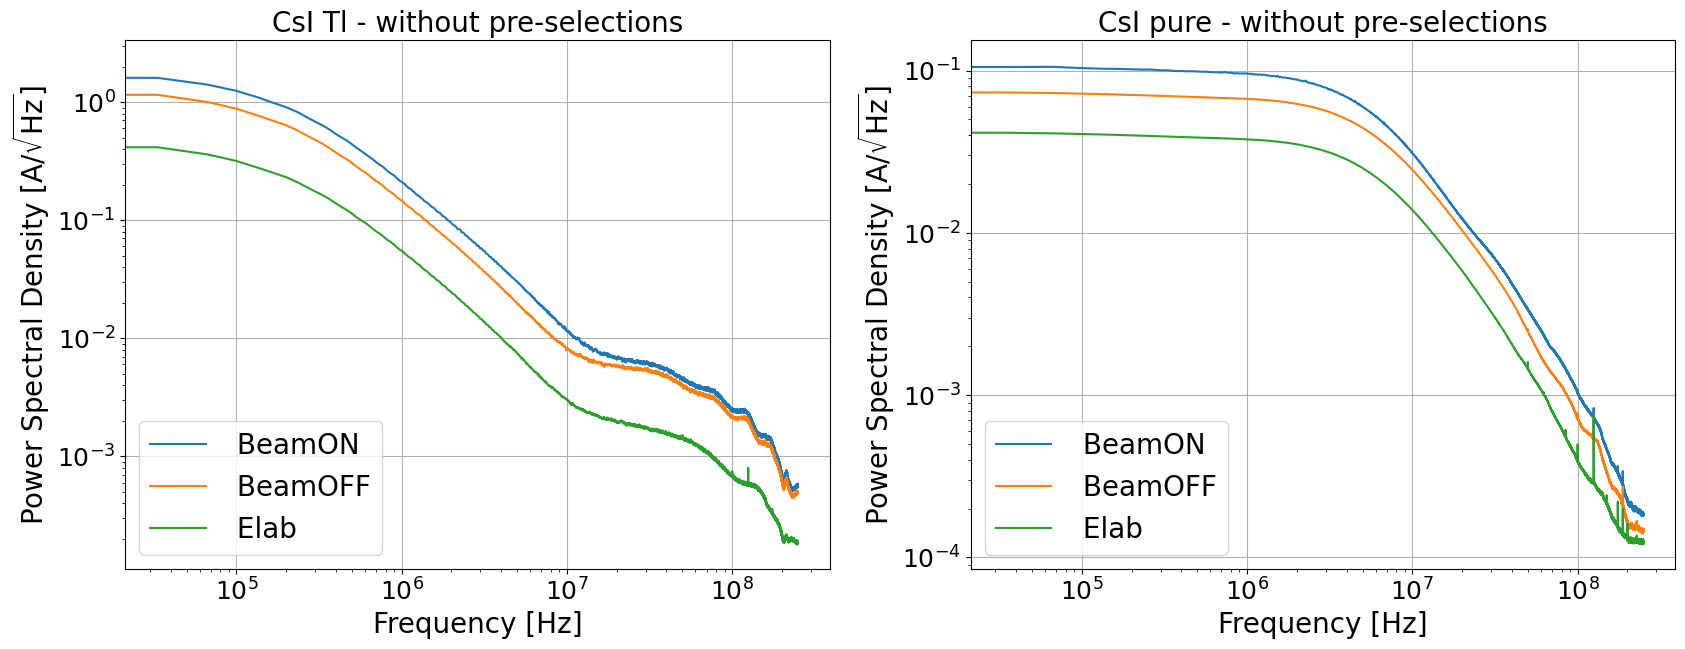

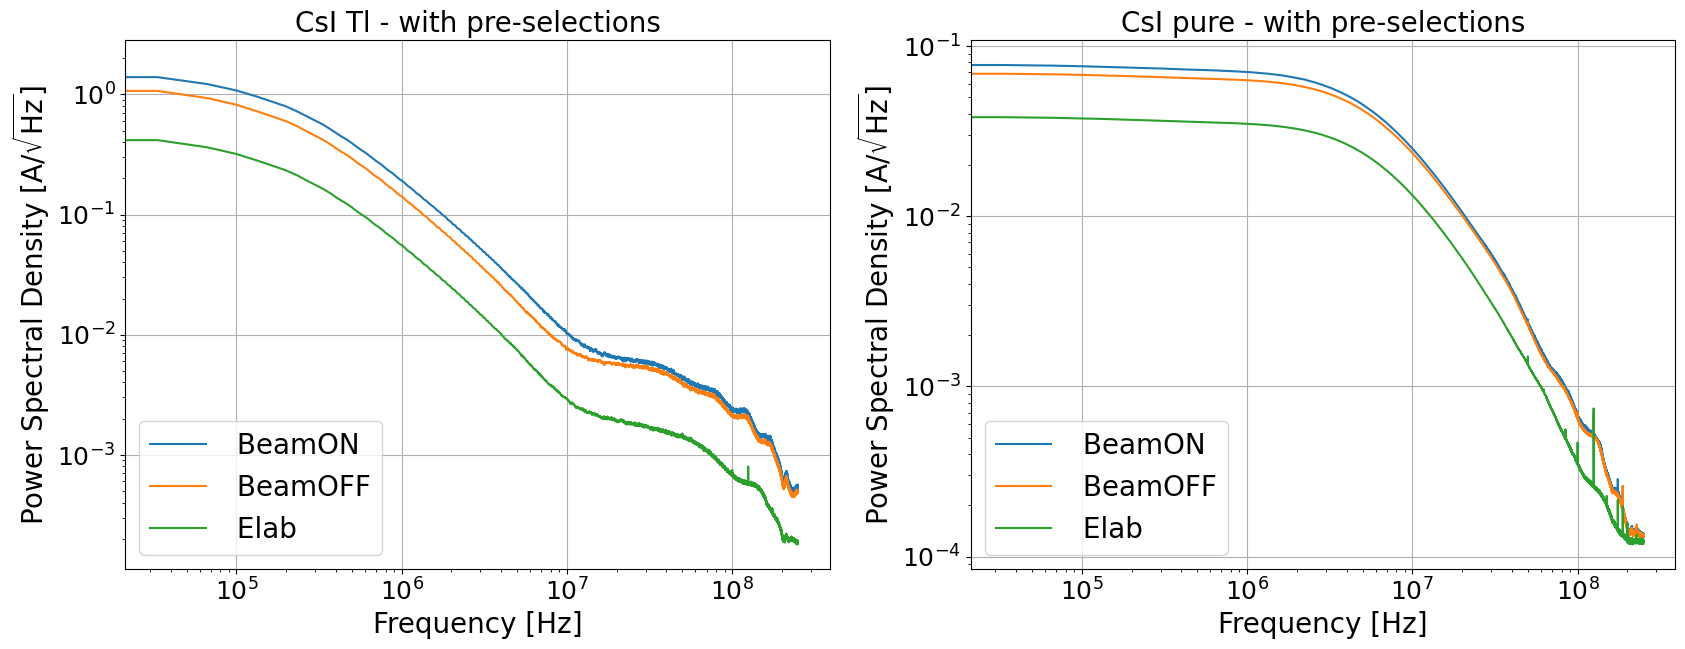

In [95]:


fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,7))
ax1.loglog(psd_Tl_XFEL_BeamON[0][:7500], np.sqrt(psd_Tl_XFEL_BeamON[1][:7500]), label=' BeamON')
ax1.loglog(psd_Tl_XFEL_BeamOFF[0][:7500], np.sqrt(psd_Tl_XFEL_BeamOFF[1][:7500]), label=' BeamOFF')
ax1.loglog(psd_Tl_Elab[0][:7500], np.sqrt(psd_Tl_Elab[1][:7500]), label=' Elab')
ax1.set_title ('CsI Tl - without pre-selections',fontsize = 20)
ax1.set_xlabel('Frequency [Hz]',fontsize = 20)
ax1.set_ylabel(r'Power Spectral Density [A/$\sqrt{\mathrm{Hz}}$]',fontsize = 20)
# ax1.set_ylim(1e-3, 2e0)
ax1.grid('both')
ax1.legend(fontsize = 20, loc = 'lower left')


ax2.loglog(psd_pure_XFEL_BeamON[0][:7500], np.sqrt(psd_pure_XFEL_BeamON[1][:7500]), label=' BeamON')
ax2.loglog(psd_pure_XFEL_BeamOFF[0][:7500], np.sqrt(psd_pure_XFEL_BeamOFF[1][:7500]), label=' BeamOFF')
ax2.loglog(psd_pure_Elab[0][:7500], np.sqrt(psd_pure_Elab[1][:7500]), label=' Elab')
ax2.set_title ('CsI pure - without pre-selections',fontsize = 20)
ax2.set_xlabel('Frequency [Hz]',fontsize = 20)
ax2.set_ylabel(r'Power Spectral Density [A/$\sqrt{\mathrm{Hz}}$]',fontsize = 20)
# ax2.set_ylim(1e-3, 2e0)
ax2.grid('both')
ax2.legend(fontsize = 20, loc = 'lower left')


fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,7))
ax1.loglog(psd_Tl_XFEL_BeamON_[0][:7500], np.sqrt(psd_Tl_XFEL_BeamON_[1][:7500]), label=' BeamON')
ax1.loglog(psd_Tl_XFEL_BeamOFF_[0][:7500], np.sqrt(psd_Tl_XFEL_BeamOFF_[1][:7500]), label=' BeamOFF')
ax1.loglog(psd_Tl_Elab_[0][:7500], np.sqrt(psd_Tl_Elab_[1][:7500]), label=' Elab')
ax1.set_title ('CsI Tl - with pre-selections',fontsize = 20)
ax1.set_xlabel('Frequency [Hz]',fontsize = 20)
ax1.set_ylabel(r'Power Spectral Density [A/$\sqrt{\mathrm{Hz}}$]',fontsize = 20)
# ax1.set_ylim(1e-3, 2e0)
ax1.grid('both')
ax1.legend(fontsize = 20, loc = 'lower left')


ax2.loglog(psd_pure_XFEL_BeamON_[0][:7500], np.sqrt(psd_pure_XFEL_BeamON_[1][:7500]), label=' BeamON')
ax2.loglog(psd_pure_XFEL_BeamOFF_[0][:7500], np.sqrt(psd_pure_XFEL_BeamOFF_[1][:7500]), label=' BeamOFF')
ax2.loglog(psd_pure_Elab_[0][:7500], np.sqrt(psd_pure_Elab_[1][:7500]), label=' Elab')
ax2.set_title ('CsI pure - with pre-selections',fontsize = 20)
ax2.set_xlabel('Frequency [Hz]',fontsize = 20)
ax2.set_ylabel(r'Power Spectral Density [A/$\sqrt{\mathrm{Hz}}$]',fontsize = 20)
# ax2.set_ylim(1e-3, 2e0)
ax2.grid('both')
ax2.legend(fontsize = 20, loc = 'lower left')


# fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,7))
# ax1.loglog(psd_Tl_XFEL_BeamON[0][:7500], np.sqrt(psd_Tl_XFEL_BeamON[1][:7500]), label=' BeamON')
# ax1.loglog(psd_Tl_XFEL_BeamOFF[0][:7500], np.sqrt(psd_Tl_XFEL_BeamOFF[1][:7500]), label=' BeamOFF')
# ax1.loglog(psd_Tl_Elab[0][:7500], np.sqrt(psd_Tl_Elab[1][:7500]), label=' Elab')
# ax1.set_title ('CsI pure - without pre-selections',fontsize = 20)
# ax1.set_xlabel('Frequency [Hz]',fontsize = 20)
# ax1.set_ylabel(r'Power Spectral Density [A/$\sqrt{\mathrm{Hz}}$]',fontsize = 20)
# ax1.set_ylim(1e-4, 2e0)
# ax1.grid('both')
# ax1.legend(fontsize = 20, loc = 'lower left')


# ax2.loglog(psd_pure_XFEL_BeamON[0][:7500], np.sqrt(psd_pure_XFEL_BeamON[1][:7500]), label=' BeamON')
# ax2.loglog(psd_pure_XFEL_BeamOFF[0][:7500], np.sqrt(psd_pure_XFEL_BeamOFF[1][:7500]), label=' BeamOFF')
# ax2.loglog(psd_pure_Elab[0][:7500], np.sqrt(psd_pure_Elab[1][:7500]), label=' Elab')
# ax2.set_title ('CsI pure - without pre-selections',fontsize = 20)
# ax2.set_xlabel('Frequency [Hz]',fontsize = 20)
# ax2.set_ylabel(r'Power Spectral Density [A/$\sqrt{\mathrm{Hz}}$]',fontsize = 20)
# ax2.set_ylim(1e-4, 2e0)
# ax2.grid('both')
# ax2.legend(fontsize = 20, loc = 'lower left')


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


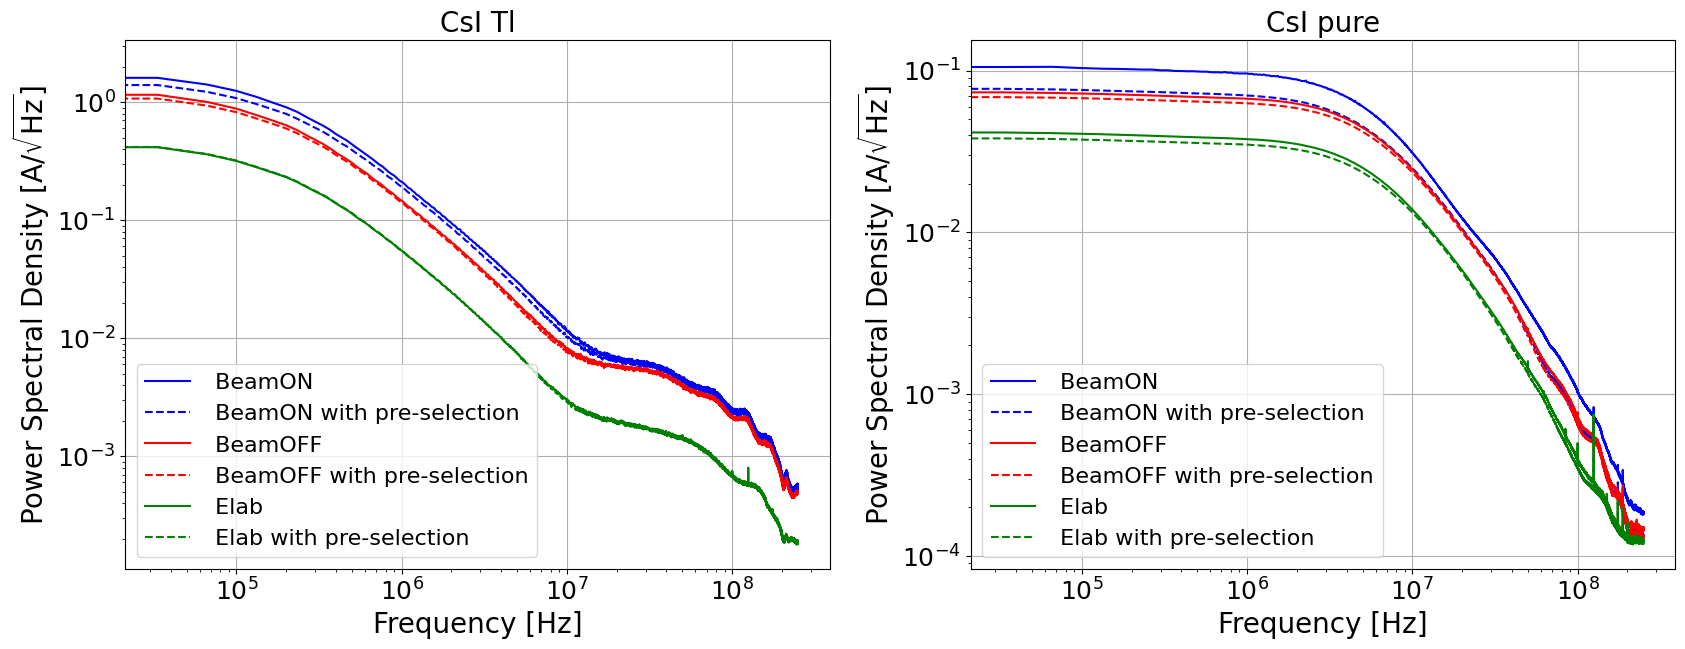

In [104]:


fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,7))
ax1.loglog(psd_Tl_XFEL_BeamON[0][:7500], np.sqrt(psd_Tl_XFEL_BeamON[1][:7500]), color = 'blue', label=' BeamON')
ax1.loglog(psd_Tl_XFEL_BeamON_[0][:7500], np.sqrt(psd_Tl_XFEL_BeamON_[1][:7500]), linestyle = '--', color = 'blue', label=' BeamON with pre-selection')
ax1.loglog(psd_Tl_XFEL_BeamOFF[0][:7500], np.sqrt(psd_Tl_XFEL_BeamOFF[1][:7500]), color = 'red', label=' BeamOFF')
ax1.loglog(psd_Tl_XFEL_BeamOFF_[0][:7500], np.sqrt(psd_Tl_XFEL_BeamOFF_[1][:7500]), linestyle = '--', color = 'red', label=' BeamOFF with pre-selection')
ax1.loglog(psd_Tl_Elab[0][:7500], np.sqrt(psd_Tl_Elab[1][:7500]), color= 'green', label=' Elab')
ax1.loglog(psd_Tl_Elab_[0][:7500], np.sqrt(psd_Tl_Elab_[1][:7500]), linestyle = '--', color= 'green', label=' Elab with pre-selection')
ax1.set_title ('CsI Tl',fontsize = 20)
ax1.set_xlabel('Frequency [Hz]',fontsize = 20)
ax1.set_ylabel(r'Power Spectral Density [A/$\sqrt{\mathrm{Hz}}$]',fontsize = 20)
# ax1.set_ylim(1e-3, 2e0)
ax1.grid('both')
ax1.legend(fontsize = 16, loc = 'lower left')


ax2.loglog(psd_pure_XFEL_BeamON[0][:7500], np.sqrt(psd_pure_XFEL_BeamON[1][:7500]), color = 'blue', label=' BeamON')
ax2.loglog(psd_pure_XFEL_BeamON_[0][:7500], np.sqrt(psd_pure_XFEL_BeamON_[1][:7500]), linestyle = '--', color = 'blue', label=' BeamON with pre-selection')
ax2.loglog(psd_pure_XFEL_BeamOFF[0][:7500], np.sqrt(psd_pure_XFEL_BeamOFF[1][:7500]), color = 'red', label=' BeamOFF')
ax2.loglog(psd_pure_XFEL_BeamOFF_[0][:7500], np.sqrt(psd_pure_XFEL_BeamOFF_[1][:7500]), linestyle = '--', color = 'red', label=' BeamOFF with pre-selection')
ax2.loglog(psd_pure_Elab[0][:7500], np.sqrt(psd_pure_Elab[1][:7500]), color= 'green', label=' Elab')
ax2.loglog(psd_pure_Elab_[0][:7500], np.sqrt(psd_pure_Elab_[1][:7500]), linestyle = '--', color= 'green', label=' Elab with pre-selection')
ax2.set_title ('CsI pure',fontsize = 20)
ax2.set_xlabel('Frequency [Hz]',fontsize = 20)
ax2.set_ylabel(r'Power Spectral Density [A/$\sqrt{\mathrm{Hz}}$]',fontsize = 20)
# ax2.set_ylim(1e-3, 2e0)
ax2.grid('both')
ax2.legend(fontsize = 16, loc = 'lower left')



/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


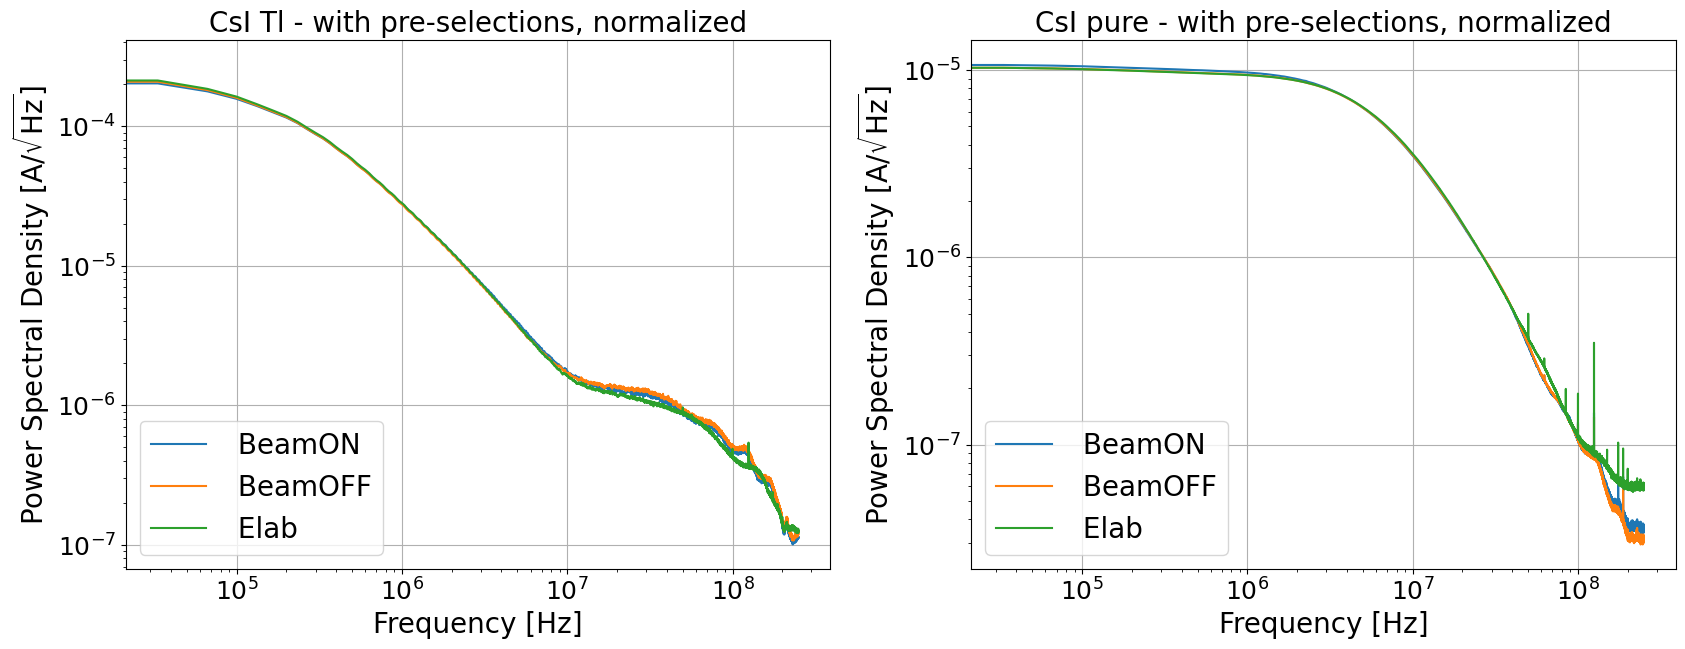

In [143]:

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,7))
ax1.loglog(psd_Tl_XFEL_BeamON_norm[0][:7500], np.sqrt(psd_Tl_XFEL_BeamON_norm[1][:7500]), label=' BeamON')
ax1.loglog(psd_Tl_XFEL_BeamOFF_norm[0][:7500], np.sqrt(psd_Tl_XFEL_BeamOFF_norm[1][:7500]), label=' BeamOFF')
ax1.loglog(psd_Tl_Elab_norm[0][:7500], np.sqrt(psd_Tl_Elab_norm[1][:7500]), label=' Elab')
ax1.set_title ('CsI Tl - with pre-selections, normalized',fontsize = 20)
ax1.set_xlabel('Frequency [Hz]',fontsize = 20)
ax1.set_ylabel(r'Power Spectral Density [A/$\sqrt{\mathrm{Hz}}$]',fontsize = 20)
# ax1.set_ylim(1e-3, 2e0)
ax1.grid('both')
ax1.legend(fontsize = 20, loc = 'lower left')


ax2.loglog(psd_pure_XFEL_BeamON_norm[0][:7500], np.sqrt(psd_pure_XFEL_BeamON_norm[1][:7500]), label=' BeamON')
ax2.loglog(psd_pure_XFEL_BeamOFF_norm[0][:7500], np.sqrt(psd_pure_XFEL_BeamOFF_norm[1][:7500]), label=' BeamOFF')
ax2.loglog(psd_pure_Elab_norm[0][:7500], np.sqrt(psd_pure_Elab_norm[1][:7500]), label=' Elab')
ax2.set_title ('CsI pure - with pre-selections, normalized',fontsize = 20)
ax2.set_xlabel('Frequency [Hz]',fontsize = 20)
ax2.set_ylabel(r'Power Spectral Density [A/$\sqrt{\mathrm{Hz}}$]',fontsize = 20)
# ax2.set_ylim(1e-3, 2e0)
ax2.grid('both')
ax2.legend(fontsize = 20, loc = 'lower left')



NameError: name 'psd_Tl_XFEL_BeamONnorm' is not defined

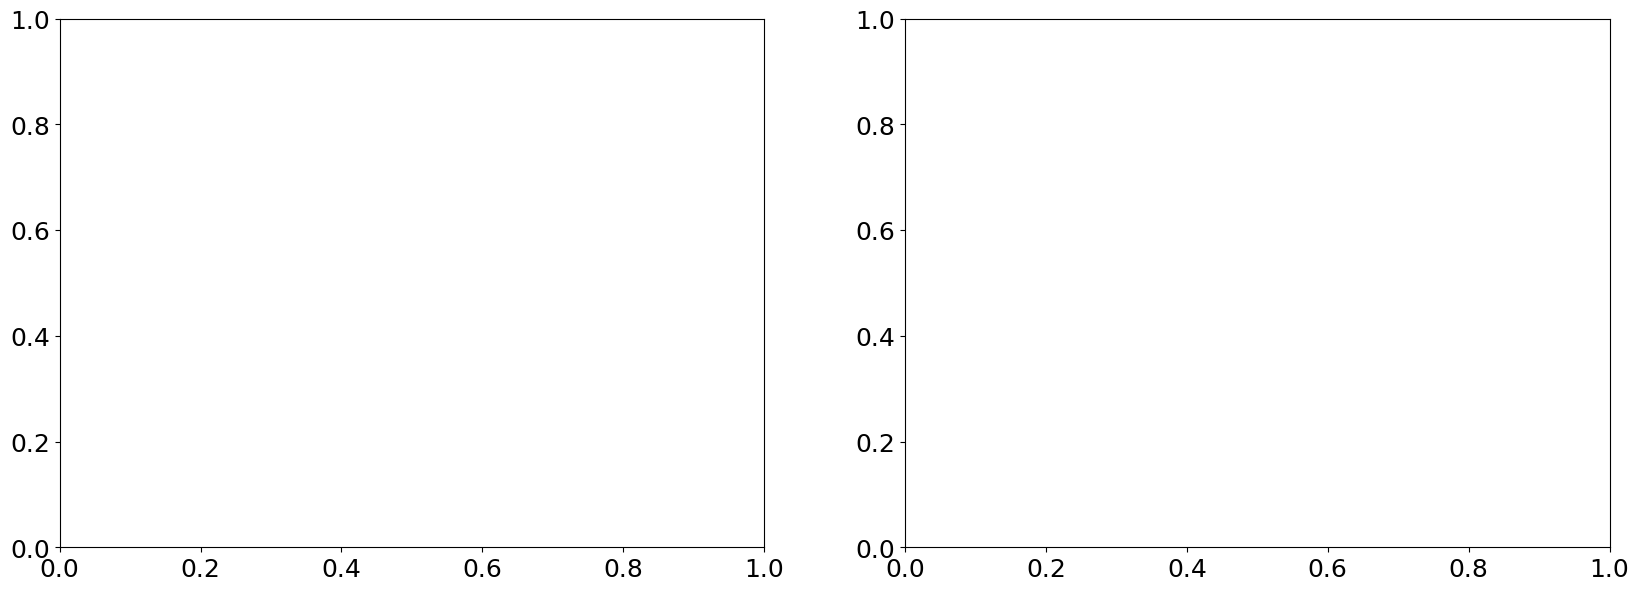

In [3]:

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,7))
ax1.loglog(psd_Tl_XFEL_BeamONnorm[0][:7500], np.sqrt(psd_Tl_XFEL_BeamONnorm[1][:7500]), color = 'blue', label=' BeamON')
ax1.loglog(psd_Tl_XFEL_BeamON_norm[0][:7500], np.sqrt(psd_Tl_XFEL_BeamON_norm[1][:7500]), linestyle = '--', color = 'blue', label=' BeamON with pre-selection')
ax1.loglog(psd_Tl_XFEL_BeamOFFnorm[0][:7500], np.sqrt(psd_Tl_XFEL_BeamOFFnorm[1][:7500]), color = 'red', label=' BeamOFF')
ax1.loglog(psd_Tl_XFEL_BeamOFF_norm[0][:7500], np.sqrt(psd_Tl_XFEL_BeamOFF_norm[1][:7500]), linestyle = '--', color = 'red', label=' BeamOFF with pre-selection')
ax1.loglog(psd_Tl_Elabnorm[0][:7500], np.sqrt(psd_Tl_Elabnorm[1][:7500]), color= 'green', label=' Elab')
ax1.loglog(psd_Tl_Elab_norm[0][:7500], np.sqrt(psd_Tl_Elab_norm[1][:7500]), color= 'green', label=' Elab with pre-selection')

ax1.set_title ('CsI Tl - normalized',fontsize = 20)
ax1.set_xlabel('Frequency [Hz]',fontsize = 20)
ax1.set_ylabel(r'Power Spectral Density [A/$\sqrt{\mathrm{Hz}}$]',fontsize = 20)
ax1.grid('both')
ax1.legend(fontsize = 20, loc = 'lower left')

# ax2.loglog(psd_pure_XFEL_BeamONnorm[0][:7500], np.sqrt(psd_pure_XFEL_BeamONnorm[1][:7500]), color = 'blue', label=' BeamON')
# ax2.loglog(psd_pure_XFEL_BeamON_norm[0][:7500], np.sqrt(psd_pure_XFEL_BeamON_norm[1][:7500]), linestyle = '--', color = 'blue', label=' BeamON with pre-selection')
# ax2.loglog(psd_pure_XFEL_BeamOFFnorm[0][:7500], np.sqrt(psd_pure_XFEL_BeamOFFnorm[1][:7500]), color = 'red', label=' BeamOFF')
# ax2.loglog(psd_pure_XFEL_BeamOFF_norm[0][:7500], np.sqrt(psd_pure_XFEL_BeamOFF_norm[1][:7500]), linestyle = '--', color = 'red', label=' BeamOFF with pre-selection')
ax2.loglog(psd_pure_Elabnorm[0][:7500], np.sqrt(psd_pure_Elabnorm[1][:7500]), color= 'green', label=' Elab')
ax2.loglog(psd_pure_Elab_norm[0][:7500], np.sqrt(psd_pure_Elab_norm[1][:7500]), color= 'green', label=' Elab with pre-selection')
ax2.set_title ('CsI pure - normalized',fontsize = 20)
ax2.set_xlabel('Frequency [Hz]',fontsize = 20)
ax2.set_ylabel(r'Power Spectral Density [A/$\sqrt{\mathrm{Hz}}$]',fontsize = 20)
ax2.grid('both')
ax2.legend(fontsize = 20, loc = 'lower left')

